In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spotify_songs=pd.read_csv('../INPUT/spotify_songs.csv')
spotify_songs.shape

(18454, 25)

In [3]:
spotify_songs.head().style.highlight_max(color='yellow').highlight_min(color='lightblue')

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam Na ika'y tutugon Sa mga tanong na aking nabitawan Hindi ko alam kung ito'y totoo Pangarap ka Sa bawat sandali Langit man ang tingin ko Sayo sana'y marating Hanggang dito na lang yata Ang kaya kong gawin Mangarap na lang At bumulong sa hangin Kailan kaya Darating ulit ang isang Sandali Na ako'y lilingon muli Pangarap ka o tinig mong kay lamig Ang iyong mga ngiti na sa akin ay Nakapagbigay pansin (Ikaw ba ay isang pangarap lang) Pangarap ka o tinig mong kay lamig Ang iyong mga ngiti Na sa akin ay Nakapagbigay... Pangarap ka o tinig mong kay lamig Ang iyong mga ngiti Na sa akin ay Nakapagbigay Pangarap ka o tinig mong kay lamig Ang iyong mga ngiti Na sa akin ay Nakapagbigay pansin,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,rock,classic rock,0.682000,0.401000,2,-10.068000,1,0.023600,0.279000,0.011700,0.088700,0.566000,97.091000,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blue, only as it can be And the angels, smiled at me I saw you, in that lonely bench At half past four, I kissed your soft soft hands and at 6 I kissed your lips and the angels smiled, I thought Hey I feel alive! The park sign, said it was closed And we jumped that fence with no cares at all and we kissed under a tree We danced, under the midnight sun And I loved you, without knowing you at all and we laughed and felt so free and the angels they smiled, I thought Hey, I feel alive!",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,rock,hard rock,0.303000,0.880000,9,-4.739000,1,0.044200,0.011700,0.009940,0.347000,0.404000,135.225000,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect Uh-huh You ready, Ron? I'm ready You ready, Biv? I'm ready, Slick, are you? Oh, yeah, break it down NA Girl, I, must (warn you) I sense something strange in my mind Situation is (serious) Let's cure it cause we're running out of time It's oh, so (beautiful) Relationships they seem from the start It's all so (deadly) When love is not together from the heart It's drivin' me out of my mind! That's why it's HARD for me to find Can't get it out of my head! Miss her, kiss her, love her(Wrong move you're dead!) That girl is (poison)...Never trust a big butt and smile That girl is (poison)..(""POISON!!"") NA (-caution) Before I start to meet a fly girl, you know? Cause in some (portions) You'll think she's the best thing in the world She's so - (fly) She'll drive you right out of your mind And steal your heart when you're blind Beware she's schemin', she'll make you think you're dreamin' YOU'LL fall in love and you'll be screamin', demon, HOO.. Poison, deadly, movin' in slow Lookin for a mellow fellow like DeVoe Gettin paid, laid, so better lay low Schemin on house, money, and the whole show The low pro ho she'll be cut like an aaa-FRO See what you're sayin', huh, she's a winner to you But I know she's a loser (How do you know?) Me and the crew used to do her! ""POISON!"" ""POISON!"" ""POISON!"" ""POISON!"" ""POISON!"" ""POISON!"" ""POISON!"" ""POISON! ""POISON!"" ""POISON!"" ""POISON!"" ""POISON! ""POISON!"" ""POISON!"" ""POISON!"" ""POISON! I was at the park, shake, breakin and takin 'em all And that night, I played the wall Checkin' out the fellas, the highs and lows Keepin' one eye open, still clockin' the hoes There was one particular girl that stood out from the rest Poison as can be, the high power chest Michael Biv here and I'm runnin' the show Bell, Biv DeVoe ..now you know! Yo, Slick, blow.. It's drivin' m

In [4]:
spotify_songs.info()
spotify_songs.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18454 entries, 0 to 18453
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  18454 non-null  object 
 1   track_name                18454 non-null  object 
 2   track_artist              18454 non-null  object 
 3   lyrics                    18194 non-null  object 
 4   track_popularity          18454 non-null  int64  
 5   track_album_id            18454 non-null  object 
 6   track_album_name          18454 non-null  object 
 7   track_album_release_date  18454 non-null  object 
 8   playlist_name             18454 non-null  object 
 9   playlist_id               18454 non-null  object 
 10  playlist_genre            18454 non-null  object 
 11  playlist_subgenre         18454 non-null  object 
 12  danceability              18454 non-null  float64
 13  energy                    18454 non-null  float64
 14  key   

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')

In [5]:
spotify_songs['playlist_genre'].value_counts()

pop      3993
rock     3521
rap      3391
r&b      3326
latin    2178
edm      2045
Name: playlist_genre, dtype: int64

In [6]:
spotify_songs['playlist_genre'].replace({'pop':-2,'rock':-1,'rap':-0,'r&b':0,'latin':1,'edm':2},inplace=True)

In [7]:
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18454 entries, 0 to 18453
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  18454 non-null  object 
 1   track_name                18454 non-null  object 
 2   track_artist              18454 non-null  object 
 3   lyrics                    18194 non-null  object 
 4   track_popularity          18454 non-null  int64  
 5   track_album_id            18454 non-null  object 
 6   track_album_name          18454 non-null  object 
 7   track_album_release_date  18454 non-null  object 
 8   playlist_name             18454 non-null  object 
 9   playlist_id               18454 non-null  object 
 10  playlist_genre            18454 non-null  int64  
 11  playlist_subgenre         18454 non-null  object 
 12  danceability              18454 non-null  float64
 13  energy                    18454 non-null  float64
 14  key   

In [8]:
#spotify_songs['playlist_genre'] = pd.to_numeric(spotify_songs['playlist_genre'])

In [9]:
spotify_songs.rename(columns={'playlist_genre': 'intervals'}, inplace=True)

In [10]:
spotify_songs['playlist_subgenre'].value_counts()

indie poptimism              1288
southern hip hop             1158
neo soul                     1001
electropop                    964
urban contemporary            936
hard rock                     926
classic rock                  924
post-teen pop                 891
new jack swing                881
gangster rap                  865
dance pop                     850
permanent wave                843
album rock                    828
hip hop                       689
trap                          679
latin hip hop                 673
progressive electro house     652
latin pop                     594
pop edm                       575
hip pop                       508
electro house                 484
tropical                      473
reggaeton                     438
big room                      334
Name: playlist_subgenre, dtype: int64

In [11]:
spotify_songs.drop(columns=['lyrics','track_popularity','track_album_id','track_album_name','track_album_release_date','playlist_name','playlist_id','playlist_subgenre','language'],inplace=True)

In [12]:
spotify_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18454 entries, 0 to 18453
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          18454 non-null  object 
 1   track_name        18454 non-null  object 
 2   track_artist      18454 non-null  object 
 3   intervals         18454 non-null  int64  
 4   danceability      18454 non-null  float64
 5   energy            18454 non-null  float64
 6   key               18454 non-null  int64  
 7   loudness          18454 non-null  float64
 8   mode              18454 non-null  int64  
 9   speechiness       18454 non-null  float64
 10  acousticness      18454 non-null  float64
 11  instrumentalness  18454 non-null  float64
 12  liveness          18454 non-null  float64
 13  valence           18454 non-null  float64
 14  tempo             18454 non-null  float64
 15  duration_ms       18454 non-null  int64  
dtypes: float64(9), int64(4), object(3)
memor

In [13]:
spotify_songs.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18449    False
18450    False
18451    False
18452    False
18453    False
Length: 18454, dtype: bool

In [14]:
spotify_songs.describe().style.highlight_min(color='lightblue')

,intervals,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000
mean,-0.283895,0.644066,0.692289,5.342094,-6.769159,0.580525,0.106192,0.175348,0.051216,0.189593,0.520598,120.812167,230319.306763
std,1.239789,0.150071,0.180635,3.613121,2.920757,0.493487,0.102291,0.217795,0.168263,0.153751,0.228716,27.586424,57255.086685
min,-2.000000,0.098500,0.016700,0.000000,-34.283000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,37.114000,31893.000000
25%,-1.000000,0.546000,0.573000,2.000000,-8.249000,0.000000,0.039700,0.016100,0.000000,0.092700,0.345000,98.856000,193230.250000
50%,0.000000,0.660000,0.715000,6.000000,-6.227000,1.000000,0.060300,0.081900,0.000009,0.128000,0.522000,120.045000,221340.000000
75%,0.000000,0.755000,0.835000,9.000000,-4.719000,1.000000,0.130000,0.254000,0.001720,0.246000,0.700000,135.984000,258078.250000
max,2.000000,0.979000,1.000000,11.000000,1.275000,1.000000,0.918000,0.992000,0.987000,0.996000,0.991000,214.047000,517810.000000


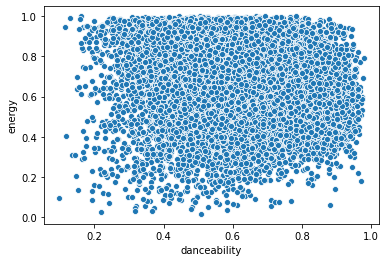

In [15]:
#Correlation between danceability and energy
sns_plot=sns.scatterplot(x="danceability", y="energy", data=spotify_songs,palette='Blues')
sns_plot.figure.savefig('../OUTPUT/out2.png')

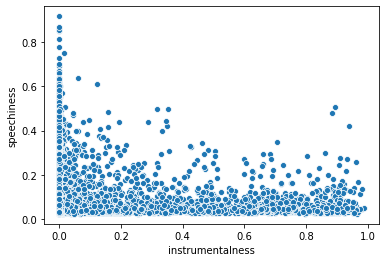

In [16]:
#Instrumentalness and speechiness
sns_plot1=sns.scatterplot(x="instrumentalness", y="speechiness", data=spotify_songs,palette='Blues')
sns_plot1.figure.savefig('../OUTPUT/out3.png')

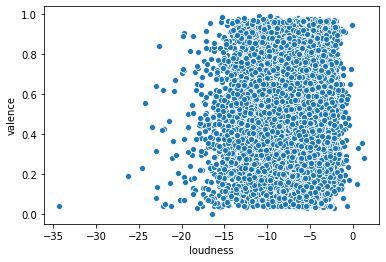

In [17]:
#Loudness and Valence
sns_plot2=sns.scatterplot(x="loudness", y="valence", data=spotify_songs)
sns_plot2.figure.savefig('../OUTPUT/out4.png')

In [18]:
spotify_songs.corr()

,intervals,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
intervals,1.000000,0.185500,0.070765,0.013334,0.114416,-0.084822,0.143093,-0.032468,0.067016,0.038531,-0.042131,-0.002977,-0.020498
danceability,0.185500,1.000000,-0.089708,0.002090,0.022830,-0.078020,0.204041,-0.029240,-0.049187,-0.114719,0.343419,-0.201465,-0.133803
energy,0.070765,-0.089708,1.000000,0.018833,0.674795,-0.009903,-0.011986,-0.546033,0.042093,0.156931,0.207941,0.138291,-0.021134
key,0.013334,0.002090,0.018833,1.000000,0.007280,-0.169589,0.026282,-0.002067,0.004243,0.000682,0.021927,-0.018967,0.016984
loudness,0.114416,0.022830,0.674795,0.007280,1.000000,-0.035276,0.029858,-0.370628,-0.099164,0.071159,0.050211,0.082558,-0.159026
mode,-0.084822,-0.078020,-0.009903,-0.169589,-0.035276,1.000000,-0.070013,0.022191,-0.002906,0.004850,-0.009382,0.026421,0.012433
speechiness,0.143093,0.204041,-0.011986,0.026282,0.029858,-0.070013,1.000000,-0.000217,-0.108365,0.060072,0.035202,0.033620,-0.094343
acousticness,-0.032468,-0.029240,-0.546033,-0.002067,-0.370628,0.022191,-0.000217,1.000000,-0.015803,-0.067491,-0.069817,-0.096149,-0.052996
instrumentalness,0.067016,-0.049187,0.042093,0.004243,-0.099164,-0.002906,-0.108365,-0.015803,1.000000,-0.000021,-0.103020,0.028126,0.078505
liveness,0.038531,-0.114719,0.156931,0.000682,0.071159,0.004850,0.060072,-0.067491,-0.000021,1.000000,-0.006931,0.015658,0.026988


Text(0.5, 1.0, 'Correlation of every features')

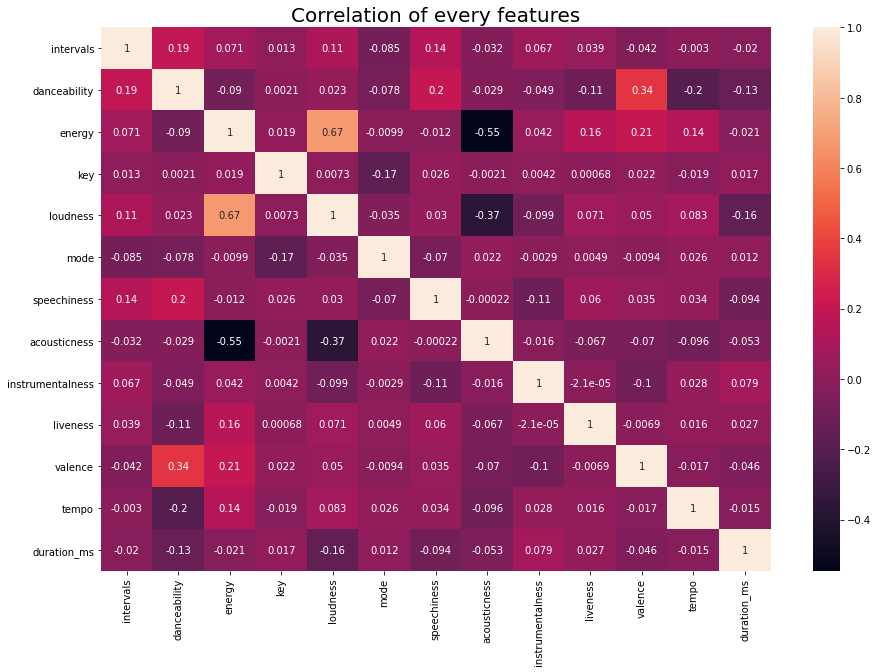

In [19]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(spotify_songs.corr(),  annot=True)
plt.title('Correlation of every features', fontsize=20)

In [20]:
#spotify_songs.plot(kind='bar',figsize=(40,40))


In [21]:
spotify_songs.to_csv('../OUTPUT/spotify.csv')

In [22]:
playlist=pd.read_csv('../OUTPUT/playlist.csv')
playlist.head()

,Unnamed: 0,artist,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
0,0,Eminem,Love The Way You Lie,15JINEqzVMv3SvJTAXAKED,0.749,0.925,10,-5.034,1,0.2270,0.000000,0.5200,0.641,86.989,263373
1,1,Kesha,TiK ToK,0HPD5WQqrq7wPWR7P7Dw1i,0.755,0.837,2,-2.718,0,0.1420,0.000000,0.2890,0.714,120.028,199693
2,2,Lady Gaga,Bad Romance,0SiywuOBRcynK0uKGWdCnn,0.696,0.921,0,-3.755,1,0.0363,0.000052,0.0842,0.714,119.001,294573
3,3,Train,"Hey, Soul Sister",4HlFJV71xXKIGcU3kRyttv,0.673,0.886,1,-4.440,0,0.0431,0.000000,0.0826,0.795,97.012,216773
4,4,Robyn,Dancing On My Own,5vd5Xnm203ZmzulaK49zJw,0.687,0.865,6,-4.663,1,0.0349,0.225000,0.0966,0.261,117.015,288670


In [23]:
playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        950 non-null    int64  
 1   artist            950 non-null    object 
 2   track_name        950 non-null    object 
 3   track_id          950 non-null    object 
 4   danceability      950 non-null    float64
 5   energy            950 non-null    float64
 6   key               950 non-null    int64  
 7   loudness          950 non-null    float64
 8   mode              950 non-null    int64  
 9   speechiness       950 non-null    float64
 10  instrumentalness  950 non-null    float64
 11  liveness          950 non-null    float64
 12  valence           950 non-null    float64
 13  tempo             950 non-null    float64
 14  duration_ms       950 non-null    int64  
dtypes: float64(8), int64(4), object(3)
memory usage: 111.5+ KB


In [24]:
playlist.columns

Index(['Unnamed: 0', 'artist', 'track_name', 'track_id', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [25]:
playlist.drop(columns=['Unnamed: 0'],inplace=True)

In [26]:
playlist.rename(columns={'artist': 'track_artist'}, inplace=True)
playlist.columns

Index(['track_artist', 'track_name', 'track_id', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [27]:
playlist.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
945    False
946    False
947    False
948    False
949    False
Length: 950, dtype: bool

In [28]:
playlist=playlist[['track_id','track_name','track_artist','danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms']]

In [29]:
playlist.head()

,track_id,track_name,track_artist,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
0,15JINEqzVMv3SvJTAXAKED,Love The Way You Lie,Eminem,0.749,0.925,10,-5.034,1,0.2270,0.000000,0.5200,0.641,86.989,263373
1,0HPD5WQqrq7wPWR7P7Dw1i,TiK ToK,Kesha,0.755,0.837,2,-2.718,0,0.1420,0.000000,0.2890,0.714,120.028,199693
2,0SiywuOBRcynK0uKGWdCnn,Bad Romance,Lady Gaga,0.696,0.921,0,-3.755,1,0.0363,0.000052,0.0842,0.714,119.001,294573
3,4HlFJV71xXKIGcU3kRyttv,"Hey, Soul Sister",Train,0.673,0.886,1,-4.440,0,0.0431,0.000000,0.0826,0.795,97.012,216773
4,5vd5Xnm203ZmzulaK49zJw,Dancing On My Own,Robyn,0.687,0.865,6,-4.663,1,0.0349,0.225000,0.0966,0.261,117.015,288670


In [30]:
#spotify.to_csv('../OUTPUT/spotify_song.csv')

In [31]:
'''spotify1=spotify[['danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms']]'''

"spotify1=spotify[['danceability', 'energy',\n       'key', 'loudness', 'mode', 'speechiness', 'instrumentalness',\n       'liveness', 'valence', 'tempo', 'duration_ms']]"

In [32]:
#spotify1.corr()